In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [4]:
dataset = pd.read_csv('/Users/prajwal/Developer/Prep/Deep_Learning/Churn_Modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
geography = pd.get_dummies(X['Geography'], drop_first= True)

In [9]:
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [10]:
X = X.drop(['Gender', 'Geography'], axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,gender,geography], axis=1)

In [13]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 11)
y shape: (10000,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [19]:
X_train.shape

(8000, 11)

In [21]:
#Creating ANN

classifier = Sequential()

In [23]:
#adding input layer

classifier.add(Dense(units = 11, activation = 'relu'))

In [24]:
#adding hidden layer

classifier.add(Dense(units = 7, activation = 'relu'))

In [25]:
# adding 2nd hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))

In [26]:
# adding output layer

classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000


536/536 [==============================] - 0s 899us/step - loss: 0.3113 - accuracy: 0.8694 - val_loss: 0.3692 - val_accuracy: 0.8489
Epoch 2/1000
536/536 [==============================] - 0s 930us/step - loss: 0.3113 - accuracy: 0.8714 - val_loss: 0.3662 - val_accuracy: 0.8508
Epoch 3/1000
536/536 [==============================] - 0s 861us/step - loss: 0.3110 - accuracy: 0.8709 - val_loss: 0.3685 - val_accuracy: 0.8463
Epoch 4/1000
536/536 [==============================] - 0s 839us/step - loss: 0.3112 - accuracy: 0.8707 - val_loss: 0.3663 - val_accuracy: 0.8470
Epoch 5/1000
536/536 [==============================] - 0s 840us/step - loss: 0.3114 - accuracy: 0.8694 - val_loss: 0.3698 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 0s 833us/step - loss: 0.3108 - accuracy: 0.8698 - val_loss: 0.3678 - val_accuracy: 0.8448
Epoch 7/1000
536/536 [==============================] - 0s 911us/step - loss: 0.3096 - accuracy: 0.8718 - val_loss: 0.3691 - val_accuracy

KeyboardInterrupt: 

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
# early stopping

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [32]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3030 - accuracy: 0.8750 - val_loss: 0.3784 - val_accuracy: 0.8489
Epoch 2/1000
536/536 [==============================] - 1s 935us/step - loss: 0.3019 - accuracy: 0.8755 - val_loss: 0.3791 - val_accuracy: 0.8478
Epoch 3/1000
536/536 [==============================] - 0s 864us/step - loss: 0.3031 - accuracy: 0.8722 - val_loss: 0.3729 - val_accuracy: 0.8527
Epoch 4/1000
536/536 [==============================] - 1s 957us/step - loss: 0.3032 - accuracy: 0.8748 - val_loss: 0.3751 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 0s 864us/step - loss: 0.3035 - accuracy: 0.8737 - val_loss: 0.3722 - val_accuracy: 0.8512
Epoch 6/1000
536/536 [==============================] - 0s 859us/step - loss: 0.3021 - accuracy: 0.8744 - val_loss: 0.3747 - val_accuracy: 0.8504
Epoch 7/1000
536/536 [==============================] - 0s 861us/step - loss: 0.3018 - accuracy: 0.8752 - val_loss: 0.3818 - v

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

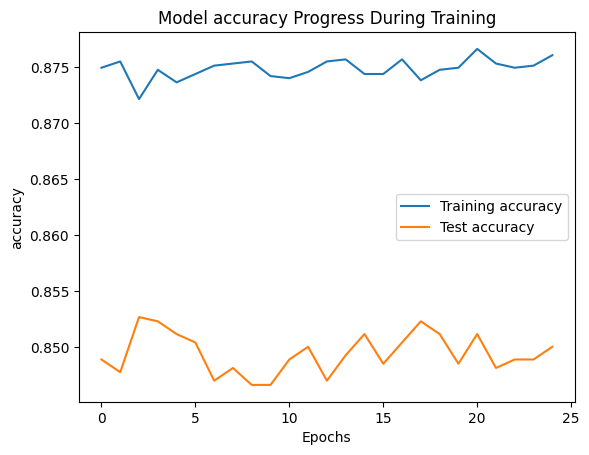

In [44]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

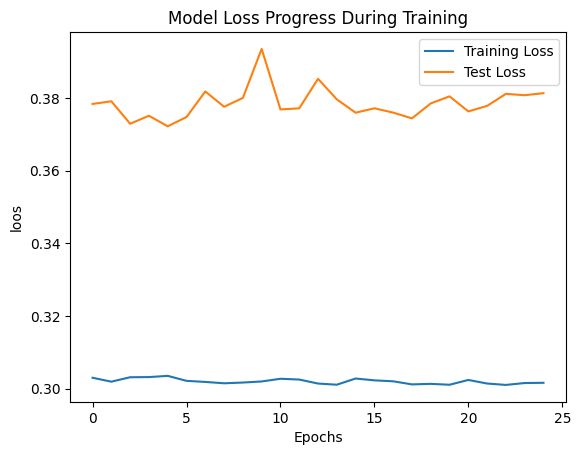

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('loos')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()

In [47]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 451us/step


In [50]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [51]:
cm

array([[1506,   89],
       [ 208,  197]])

In [54]:
score = accuracy_score(y_pred, y_test)
score

0.8515

In [55]:
#get weights

classifier.get_weights()

[array([[ 0.02046649, -0.06680698,  0.00612409,  0.23446989, -0.18776539,
          0.06619575,  0.24654841,  0.11101864,  0.05039644, -0.35477293,
          0.04220207],
        [-0.11056283, -0.30186257,  0.08005857,  0.55688643, -0.99187243,
         -1.2038989 , -0.6208267 ,  0.6674011 ,  1.5171684 , -0.48838603,
          0.23647329],
        [ 0.5633876 , -0.24467401, -0.23450962,  0.38367265,  0.10774104,
         -0.28064862, -0.39345366, -0.10209794, -0.25145516,  0.22222401,
          0.20530094],
        [-0.13598752,  1.1230029 , -0.49528223, -0.63591236,  0.41157827,
         -0.05281637,  0.13927591, -0.21005775,  0.2202156 , -0.05971964,
         -0.39132723],
        [ 1.3260708 ,  0.8514616 , -1.3233609 ,  0.11494347,  0.15145384,
          0.03598673,  0.29222217,  0.03247829,  0.3708996 , -0.15687898,
          0.90452236],
        [-0.11771569,  0.44709608,  0.1824831 , -0.06687567,  0.5110638 ,
          0.14591438,  0.4843717 ,  1.0443468 , -0.11758742, -0.9232301